In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist;
from keras.models import Sequential;
from keras.layers import Dense, Dropout, Flatten;
#Import the CNN related layers
#from keras.layers import Conv2D, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D;
from keras.utils import to_categorical;

In [2]:
#!/bin/bash
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/prasadvpatil/mrl-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22.5M  100 22.5M    0     0  23.0M      0 --:--:-- --:--:-- --:--:-- 23.0M


In [3]:
!unzip -q archive.zip

replace train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
image_size = (180, 180)
batch_size = 4000
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size = 4000,
    color_mode='grayscale'
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


In [5]:
for image_batch, labels_batch in train_ds:
    x_train = image_batch.numpy()
    y_train = labels_batch.numpy()
    break

for image_batch, labels_batch in val_ds:
    x_test = image_batch.numpy()
    y_test = labels_batch.numpy()

0


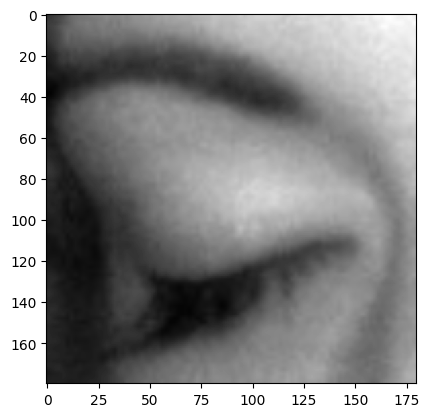

In [6]:
plt.imshow(x_train[3], cmap = 'gray')
print(y_train[3])
# Drowsy image refers to y = 0

In [7]:
x_train.shape

(3200, 180, 180, 1)

In [8]:
training_samples, height, width, _ = x_train.shape

In [9]:
testing_samples,_,_,_ = x_test.shape

In [10]:
print("Height: "+str(height)+" x Width:" + str(width))

Height: 180 x Width:180


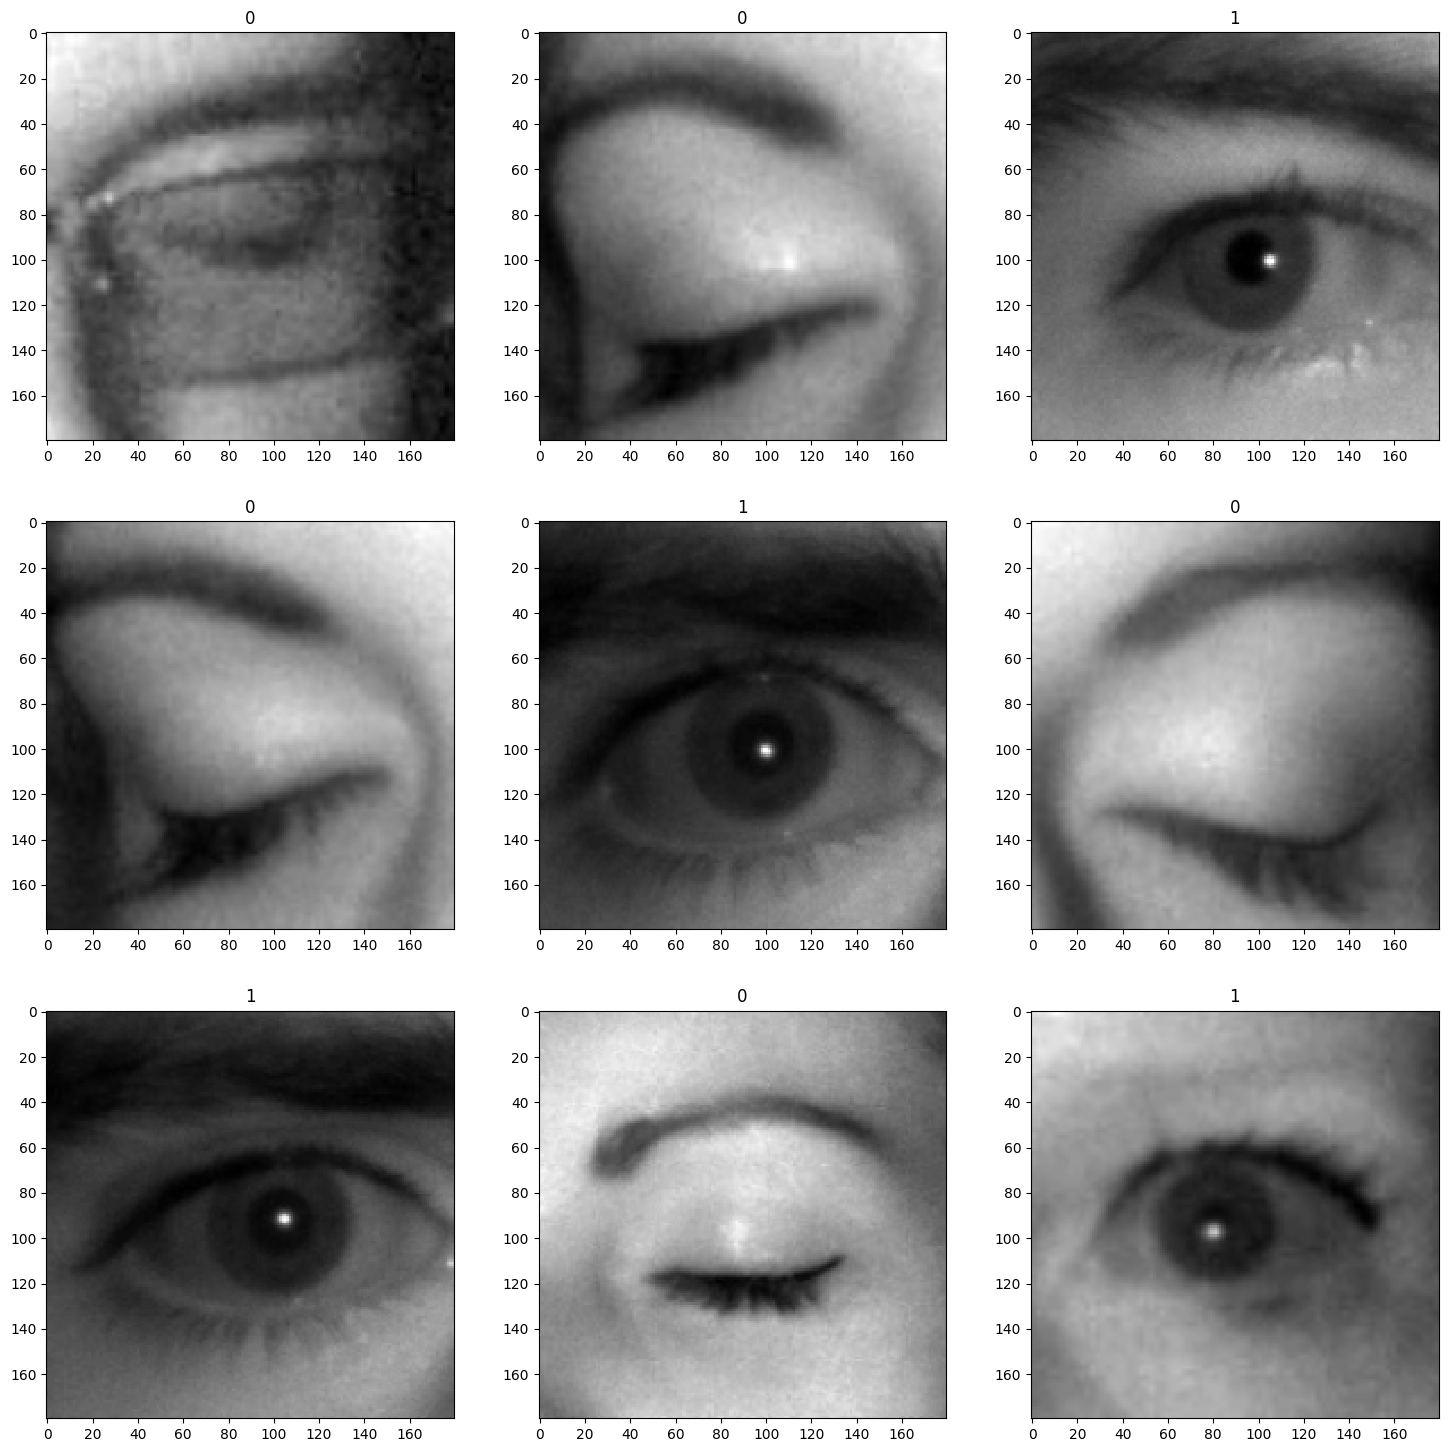

In [11]:
plt.figure(figsize=(18, 18))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(f"{y_train[i]}")
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
plt.show()

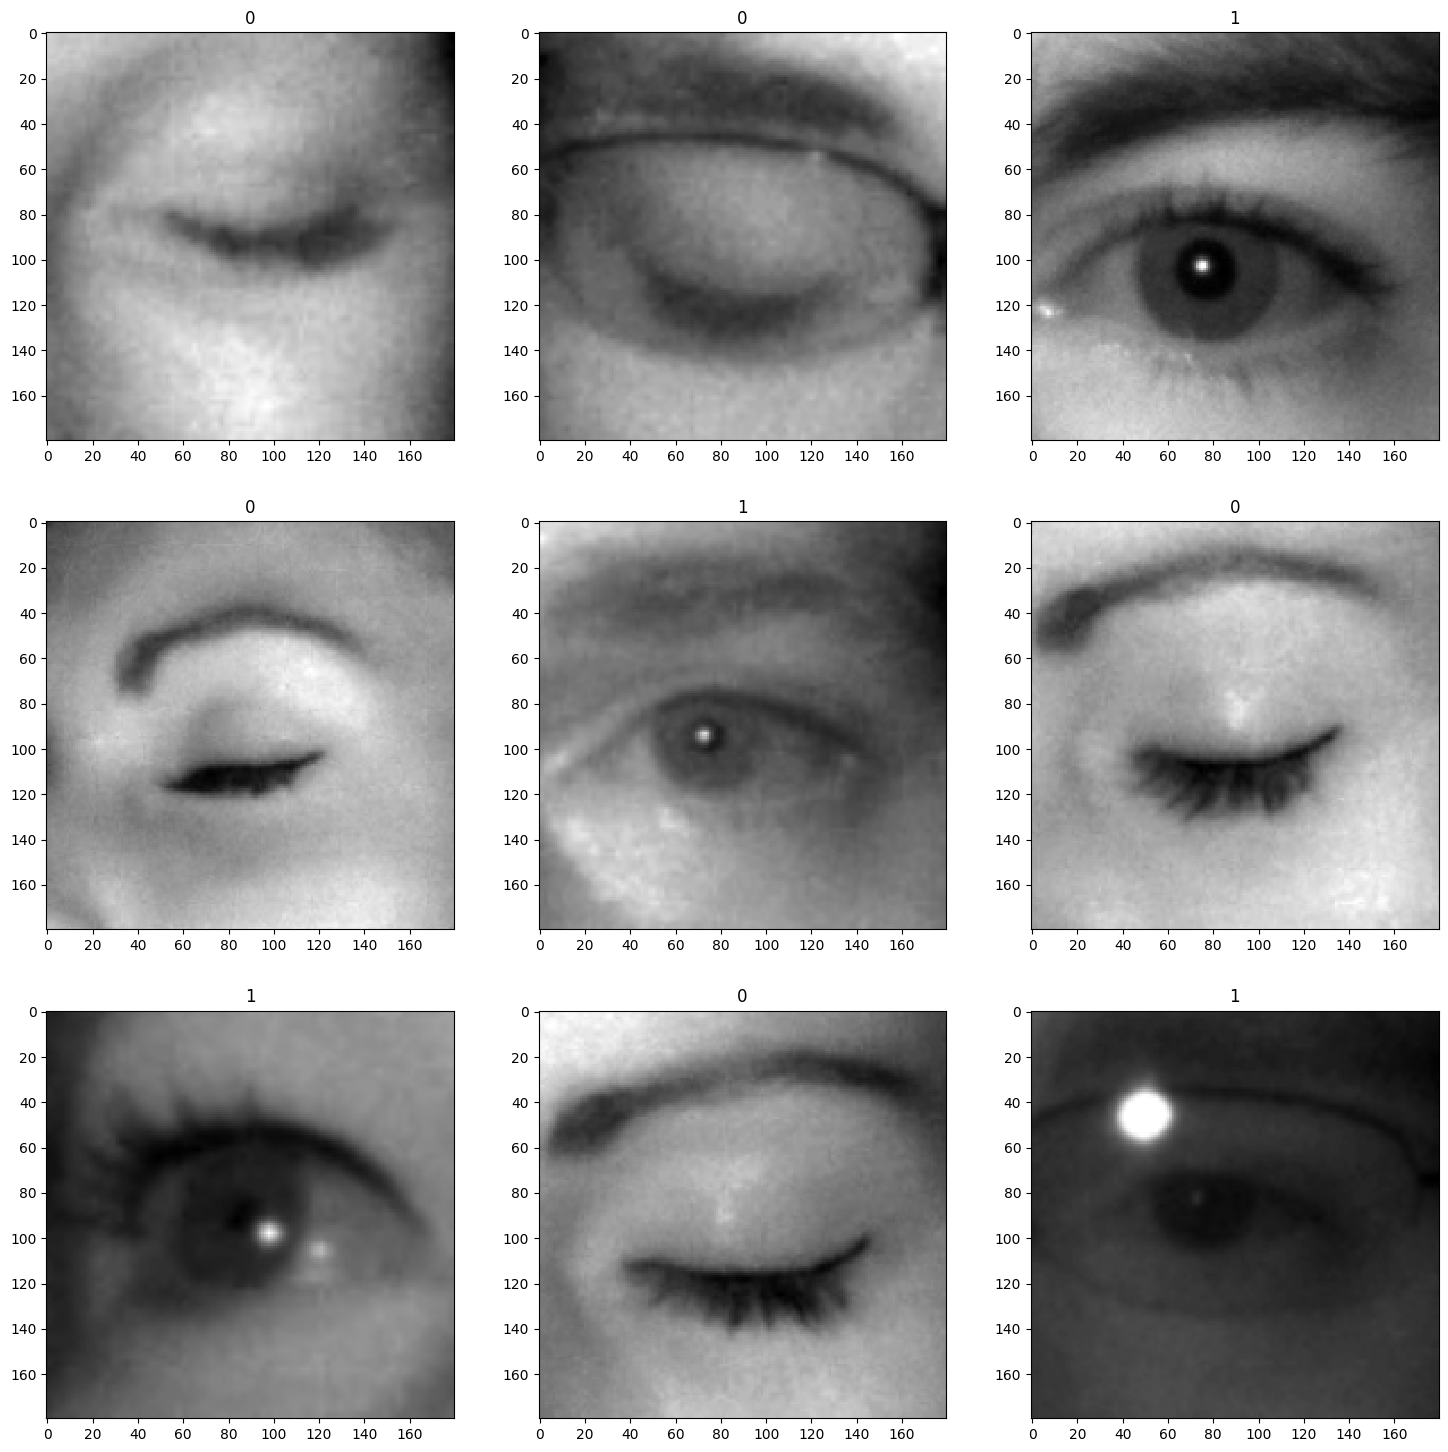

In [12]:
plt.figure(figsize=(18, 18))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(f"{y_test[i]}")
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
plt.show()

In [13]:
print("Training Samples:", training_samples)
print("Testing Samples:", testing_samples)

Training Samples: 3200
Testing Samples: 800


In [14]:
x_train

array([[[[ 89.      ],
         [ 88.55    ],
         [ 87.583336],
         ...,
         [ 42.54168 ],
         [ 40.12503 ],
         [ 39.      ]],

        [[ 88.775   ],
         [ 88.476875],
         [ 87.836464],
         ...,
         [ 42.28855 ],
         [ 40.19815 ],
         [ 39.225   ]],

        [[ 88.291664],
         [ 88.31979 ],
         [ 88.38021 ],
         ...,
         [ 41.7448  ],
         [ 40.355225],
         [ 39.708332]],

        ...,

        [[ 84.708336],
         [ 84.38959 ],
         [ 83.704865],
         ...,
         [ 38.708336],
         [ 38.708336],
         [ 38.708336]],

        [[ 84.225006],
         [ 84.12376 ],
         [ 83.90625 ],
         ...,
         [ 38.225006],
         [ 38.225006],
         [ 38.225006]],

        [[ 84.      ],
         [ 84.      ],
         [ 84.      ],
         ...,
         [ 38.      ],
         [ 38.      ],
         [ 38.      ]]],


       [[[ 77.      ],
         [ 78.375   ],
         [ 80.

## We now have to engineer the image data into the right form
## For CNN, we would need the data in Height x Width X Channels form.
## Since the image is in grayscale, we will use channel = 1

In [15]:
channel = 1
x_train = x_train.reshape(training_samples, height, width, channel).astype('float32')
x_test = x_test.reshape(testing_samples, height, width, channel).astype('float32')

In [16]:
x_train

array([[[[ 89.      ],
         [ 88.55    ],
         [ 87.583336],
         ...,
         [ 42.54168 ],
         [ 40.12503 ],
         [ 39.      ]],

        [[ 88.775   ],
         [ 88.476875],
         [ 87.836464],
         ...,
         [ 42.28855 ],
         [ 40.19815 ],
         [ 39.225   ]],

        [[ 88.291664],
         [ 88.31979 ],
         [ 88.38021 ],
         ...,
         [ 41.7448  ],
         [ 40.355225],
         [ 39.708332]],

        ...,

        [[ 84.708336],
         [ 84.38959 ],
         [ 83.704865],
         ...,
         [ 38.708336],
         [ 38.708336],
         [ 38.708336]],

        [[ 84.225006],
         [ 84.12376 ],
         [ 83.90625 ],
         ...,
         [ 38.225006],
         [ 38.225006],
         [ 38.225006]],

        [[ 84.      ],
         [ 84.      ],
         [ 84.      ],
         ...,
         [ 38.      ],
         [ 38.      ],
         [ 38.      ]]],


       [[[ 77.      ],
         [ 78.375   ],
         [ 80.

## Standardize/Normalize the values

In [17]:
x_train = x_train/255
x_test = x_test/255
x_train

array([[[[0.34901962],
         [0.3472549 ],
         [0.34346408],
         ...,
         [0.16683012],
         [0.15735306],
         [0.15294118]],

        [[0.34813726],
         [0.34696814],
         [0.34445673],
         ...,
         [0.16583745],
         [0.1576398 ],
         [0.15382352]],

        [[0.34624183],
         [0.34635213],
         [0.34658906],
         ...,
         [0.1637051 ],
         [0.15825579],
         [0.15571895]],

        ...,

        [[0.33218956],
         [0.33093956],
         [0.32825437],
         ...,
         [0.1517974 ],
         [0.1517974 ],
         [0.1517974 ]],

        [[0.33029413],
         [0.32989708],
         [0.3290441 ],
         ...,
         [0.14990199],
         [0.14990199],
         [0.14990199]],

        [[0.32941177],
         [0.32941177],
         [0.32941177],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14901961]]],


       [[[0.3019608 ],
         [0.30735293],
         [0.31

In [18]:
target_classes = 2
n_classes = 2

## convert integer labels into one-hot vectors

In [19]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print(y_train.shape)

(3200, 2)


In [20]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [21]:
import tensorflow as tf

@keras.utils.register_keras_serializable()
class SpatialAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SpatialAttentionLayer, self).__init__(**kwargs)
        # Create the Conv2D layer outside the call method
        self.attention_conv = Conv2D(filters=1, kernel_size=7, padding='same', activation='sigmoid')

    def call(self, input_feature):
        avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(input_feature)
        max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(input_feature)
        concat = tf.concat([avg_pool, max_pool], axis=3)
        # Use the pre-created Conv2D layer
        attention = self.attention_conv(concat)
        output = input_feature * attention
        return output

    def get_config(self):
        config = super().get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [22]:
model = Sequential()
model.add(Conv2D(input_shape=(180,180,1),filters=8,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=24, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=24, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=24, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(SpatialAttentionLayer())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [24]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 24)          │           3,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 24)          │           5,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 45, 45, 24)          │           5,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 32)          │           6,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_attention_layer              │ (None, 11, 11, 32)          │           3,137 │
│ (SpatialAttentionLayer)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         410,1

 Total params: 748,163 (2.85 MB)

 Trainable params: 748,163 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best.keras", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max')
hist = model.fit(x = x_train, y = y_train, validation_data= (x_test, y_test), epochs=8,callbacks=[checkpoint,early])

Epoch 1/8
 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6934 - loss: 0.5065
Epoch 1: val_accuracy improved from -inf to 0.97750, saving model to best.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6978 - loss: 0.5008 - val_accuracy: 0.9775 - val_loss: 0.0857
Epoch 2/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9730 - loss: 0.0862
Epoch 2: val_accuracy improved from 0.97750 to 0.98250, saving model to best.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9730 - loss: 0.0861 - val_accuracy: 0.9825 - val_loss: 0.0842
Epoch 3/8
 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9735 - loss: 0.0871
Epoch 3: val_accuracy improved from 0.98250 to 0.99375, saving model to best.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9738 - loss: 0.0863 - val_accuracy: 0.9937 - val_loss: 0.0205
Epoch 4/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9852 - loss: 0.0384
Epoch 4: val_accuracy improved from 0.99375 to 0.99500,

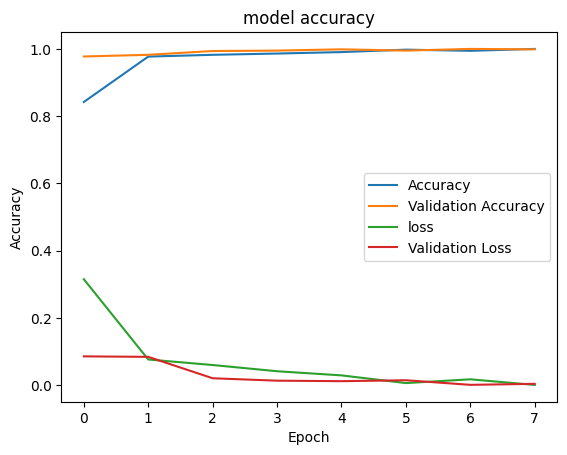

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [28]:
metrics = model.evaluate(x_test, y_test, verbose = 0);
print(f"Accuracy = {metrics[1]}")

Accuracy = 0.9987499713897705


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'spatial_attention_layer', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1/1 - 1s - 940ms/step
This image is 99.99% drowsy and 0.01% alert.


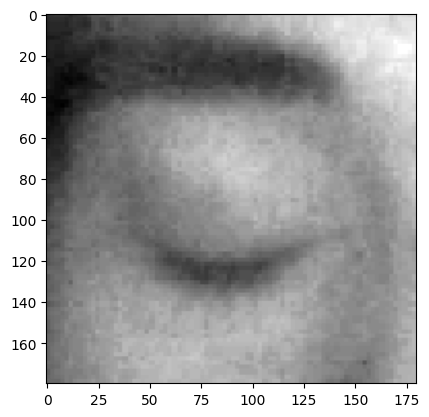

In [29]:
import keras
import matplotlib.pyplot as plt
from keras.models import load_model

img = keras.utils.load_img("/content/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png", target_size=(180, 180), color_mode = 'grayscale')
plt.imshow(img, cmap = 'gray')

#Normalize the image
img_array = keras.utils.img_to_array(img)/255

img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

saved_model = load_model("best.keras")
predictions = saved_model.predict(img_array, batch_size = 1, verbose = 2)

# score = predictions
# #score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (predictions[0][0]):.2f}% drowsy and {100 * predictions[0][1]:.2f}% alert.")

/content/train/Open_Eyes/s0001_02336_0_0_1_0_0_01.png

In [30]:
import cv2

def detect_and_crop_right_eye(image_path):
    # Load the pre-trained face and eye cascades from OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Define the face region of interest
        face_roi = gray[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(face_roi, 1.1, 4)

        if len(eyes) > 0:
            # Sort eyes by x coordinate to identify the right eye
            eyes = sorted(eyes, key=lambda e: e[0])
            (ex, ey, ew, eh) = eyes[0]  # Right eye assumed to have smaller x coordinate

            # Crop the right eye region
            right_eye = image[y + ey : y + ey + eh, x + ex : x + ex + ew]
        else:
            # If no eyes are detected, approximate the right eye region
            right_eye_x = x + int(w * 0.15)  # Approximate position for the right eye
            right_eye_y = y + int(h * 0.3)
            right_eye_w, right_eye_h = int(w * 0.3), int(h * 0.2)

            # Crop the approximated right eye region
            right_eye = image[right_eye_y : right_eye_y + right_eye_h, right_eye_x : right_eye_x + right_eye_w]

        right_eye = cv2.resize(right_eye, (180, 180))

        # Brighten the image using gamma transformation
        gamma = 1.5
        inv_gamma = 1.0 / gamma
        table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
        right_eye = cv2.LUT(right_eye, table)

        return right_eye

    print("No face detected.")
    return None

# Usage example
right_eye = detect_and_crop_right_eye('2024-11-09-131622.jpg')


In [31]:
import numpy as np
def rgb2gray(rgb):
       return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

1/1 - 1s - 538ms/step
This image is 0.02% drowsy and 99.98% alert.


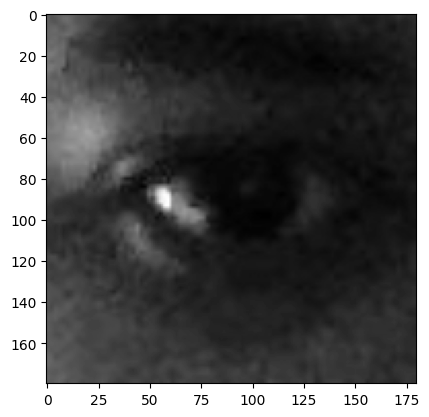

In [32]:
import keras
import matplotlib.pyplot as plt
from keras.models import load_model

# img = keras.utils.load_img(right_eye, target_size=(180, 180), color_mode = 'grayscale')
# plt.imshow(img, cmap = 'gray')

right_eye = rgb2gray(right_eye)
img = right_eye
plt.imshow(img, cmap = 'gray')

#Normalize the image
img_array = keras.utils.img_to_array(img)/255

img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

saved_model = load_model("best.keras")
predictions = saved_model.predict(img_array, batch_size = 1, verbose = 2)

# score = predictions
# #score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (predictions[0][0]):.2f}% drowsy and {100 * predictions[0][1]:.2f}% alert.")